In [1]:
## Define read_mnist_dset function for MNIST data loading
install.packages("dslabs")
install.packages("overlapping")

read_mnist_dset <- function(){
  require(dslabs)
  require(overlapping)
  
  mnist_dset = dslabs::read_mnist()
  
  train_0 = which(mnist_dset$train$labels == 0)
  train_1 = which(mnist_dset$train$labels == 1)
  train_2 = which(mnist_dset$train$labels == 2)
  train_3 = which(mnist_dset$train$labels == 3)
  train_4 = which(mnist_dset$train$labels == 4)
  train_5 = which(mnist_dset$train$labels == 5)
  train_6 = which(mnist_dset$train$labels == 6)
  train_7 = which(mnist_dset$train$labels == 7)
  train_8 = which(mnist_dset$train$labels == 8)
  train_9 = which(mnist_dset$train$labels == 9)
  
  train_0_image = mnist_dset$train$images[train_0,]
  train_1_image = mnist_dset$train$images[train_1,]
  train_2_image = mnist_dset$train$images[train_2,]
  train_3_image = mnist_dset$train$images[train_3,]
  train_4_image = mnist_dset$train$images[train_4,]
  train_5_image = mnist_dset$train$images[train_5,]
  train_6_image = mnist_dset$train$images[train_6,]
  train_7_image = mnist_dset$train$images[train_7,]
  train_8_image = mnist_dset$train$images[train_8,]
  train_9_image = mnist_dset$train$images[train_9,]
  
  test_0 = which(mnist_dset$test$labels == 0)
  test_1 = which(mnist_dset$test$labels == 1)
  test_2 = which(mnist_dset$test$labels == 2)
  test_3 = which(mnist_dset$test$labels == 3)
  test_4 = which(mnist_dset$test$labels == 4)
  test_5 = which(mnist_dset$test$labels == 5)
  test_6 = which(mnist_dset$test$labels == 6)
  test_7 = which(mnist_dset$test$labels == 7)
  test_8 = which(mnist_dset$test$labels == 8)
  test_9 = which(mnist_dset$test$labels == 9)
  
  test_0_image = mnist_dset$test$images[test_0,]
  test_1_image = mnist_dset$test$images[test_1,]
  test_2_image = mnist_dset$test$images[test_2,]
  test_3_image = mnist_dset$test$images[test_3,]
  test_4_image = mnist_dset$test$images[test_4,]
  test_5_image = mnist_dset$test$images[test_5,]
  test_6_image = mnist_dset$test$images[test_6,]
  test_7_image = mnist_dset$test$images[test_7,]
  test_8_image = mnist_dset$test$images[test_8,]
  test_9_image = mnist_dset$test$images[test_9,]
  
  
  train_list = list(train_0_image, train_1_image, train_2_image, train_3_image, train_4_image,
                    train_5_image, train_6_image, train_7_image, train_8_image, train_9_image)
  test_list = list(test_0_image, test_1_image, test_2_image, test_3_image, test_4_image,
                   test_5_image, test_6_image, test_7_image, test_8_image, test_9_image)
  
  train_label = c(rep(0, dim(train_0_image)[1]), rep(1, dim(train_1_image)[1]), rep(2, dim(train_2_image)[1]),
                  rep(3, dim(train_3_image)[1]), rep(4, dim(train_4_image)[1]), rep(5, dim(train_5_image)[1]),
                  rep(6, dim(train_6_image)[1]), rep(7, dim(train_7_image)[1]), rep(8, dim(train_8_image)[1]),
                  rep(9, dim(train_9_image)[1]))
  
  test_label = c(rep(0, dim(test_0_image)[1]), rep(1, dim(test_1_image)[1]), rep(2, dim(test_2_image)[1]),
                  rep(3, dim(test_3_image)[1]), rep(4, dim(test_4_image)[1]), rep(5, dim(test_5_image)[1]),
                  rep(6, dim(test_6_image)[1]), rep(7, dim(test_7_image)[1]), rep(8, dim(test_8_image)[1]),
                  rep(9, dim(test_9_image)[1]))
  
  return(list(train=train_list, test=test_list, train_label=train_label, test_label=test_label))
}

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
get_ovl <- function(target, background){
  nsample <- length(target)
  nbins <- round(1+log2(nsample))
  x <- range(min(target, background), max(target, background))
  x <- seq(x[1], x[2], length.out=nbins)
  pdf_t <- hist(target, x, plot=FALSE)
  pdf_b <- hist(background, x, plot=FALSE)
  OVL <- sum(apply((rbind(pdf_t$counts/sum(pdf_t$counts), pdf_b$counts/sum(pdf_b$counts))),2,min))
  return(OVL)
}

In [3]:
install.packages("overlapping")

get_ndim_ovl <- function(train_dset, test_dset, k=50){
  
  ## define column std function
  colSds <- function(x){
  return(apply(x, 2, sd))
  }
  
  ## Add Gaussian noise to avoid 0 column
  for(i in which(colSums(train_dset) == 0)){
    train_dset[,i] = rnorm(length(train_dset[,1]))
  }

  ## Add Gaussian noise to avoid const column
  for(i in which(colSds(train_dset) == 0)){
    train_dset[,i] = rnorm(length(train_dset[,1]))
  }
  
  ## Add Gaussian noise to avoid 0 column
  for(j in which(colSums(test_dset) == 0)){
    test_dset[,j] = rnorm(length(test_dset[,1]))
  }
  ## Add Gaussian noise to avoid const column
  for(i in which(colSds(test_dset) == 0)){
    test_dset[,i] = rnorm(length(test_dset[,1]))
  }
   
  train_pca = prcomp(train_dset, center=T) 

  ## Eigen values & Embeddings
  eigs_k = (train_pca$sdev^2)[1:k]
  train_emb = as.matrix(train_dset) %*% as.matrix(train_pca$rotation[,1:k])
  test_emb = as.matrix(test_dset) %*% as.matrix(train_pca$rotation[,1:k])

  ## Get OVL_k
  v_tr_k = data.frame(train_emb[,1:k])
  v_te_k = data.frame(test_emb[,1:k])
  ovl_k = do.call(c, lapply(1:k, function(i) overlapping::overlap(list(v_tr_k[,i], v_te_k[,i]))$OV)) ## Based on KDE
  #ovl_k = do.call(c, lapply(1:k, function(i) get_ovl(v_tr_k[,i], v_te_k[,i]))) ## Based on Histogram
  ovl = sum(eigs_k*ovl_k)/sum(eigs_k)

  return(ovl)
}

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
install.packages("ggplot2")
install.packages("ggpubr")

get_diff_graph <- function(ovl_mat){
  ovl_mat2 = as.matrix(ovl_mat)
  diag(ovl_mat2) = -1
  
  t_test_res = t.test(diag(as.matrix(ovl_mat)), as.vector(ovl_mat2)[as.vector(ovl_mat2)>-1])
  
  require(ggplot2)
  require(ggpubr)
  p = rbind(data.frame(value = diag(as.matrix(ovl_mat)), cat = "Diag"),
      data.frame(value = as.vector(ovl_mat2)[as.vector(ovl_mat2)>-1], cat = "Off-Diag")) %>%
        ggplot(aes(x=cat, y=value, col=cat)) + geom_boxplot() + geom_point() + theme_bw() + ylim(c(0, 1)) +
        scale_color_manual(values=c('#FF3E3E', '#0505FF'))

  return(list(t_test_res = t_test_res, p=p))
}

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘nloptr’, ‘pbkrtest’, ‘lme4’, ‘car’, ‘rstatix’


Warning message in install.packages("ggpubr"):
“installation of package ‘nloptr’ had non-zero exit status”
Warning message in install.packages("ggpubr"):
“installation of package ‘lme4’ had non-zero exit status”
Warning message in install.packages("ggpubr"):
“installation of package ‘pbkrtest’ had non-zero exit status”
Warning message in install.packages("ggpubr"):
“installation of package ‘car’ had non-zero exit status”
Warning message in install.packages("ggpubr"):
“installation of package ‘rstatix’ had non-zero exit status”
Warning message in install.packages("ggpubr"):
“installation of package ‘ggpubr’ had non-zero exit status”


In [5]:
## Downlaod ORL Dataset from github
download.file("https://github.com/psychemistz/MultiDimGCNR/blob/main/0processed_dsets/ORL/ORL_Preprocessed.RDS?raw=true", "./ORL_Preprocessed.RDS")

In [6]:
install.packages("R.matlab")
library(R.matlab)
orl_facenet = R.matlab::readMat("ORL_facenet_embeddings.mat")
orl_resnet50 = R.matlab::readMat("ORL_resnet50_embeddings.mat")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R.matlab v3.6.2 (2018-09-26) successfully loaded. See ?R.matlab for help.


Attaching package: ‘R.matlab’


The following objects are masked from ‘package:base’:

    getOption, isOpen




In [7]:
## MNIST example
mnist_dset = read_mnist_dset()

Loading required package: dslabs

Loading required package: overlapping

Loading required package: ggplot2

Loading required package: testthat



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



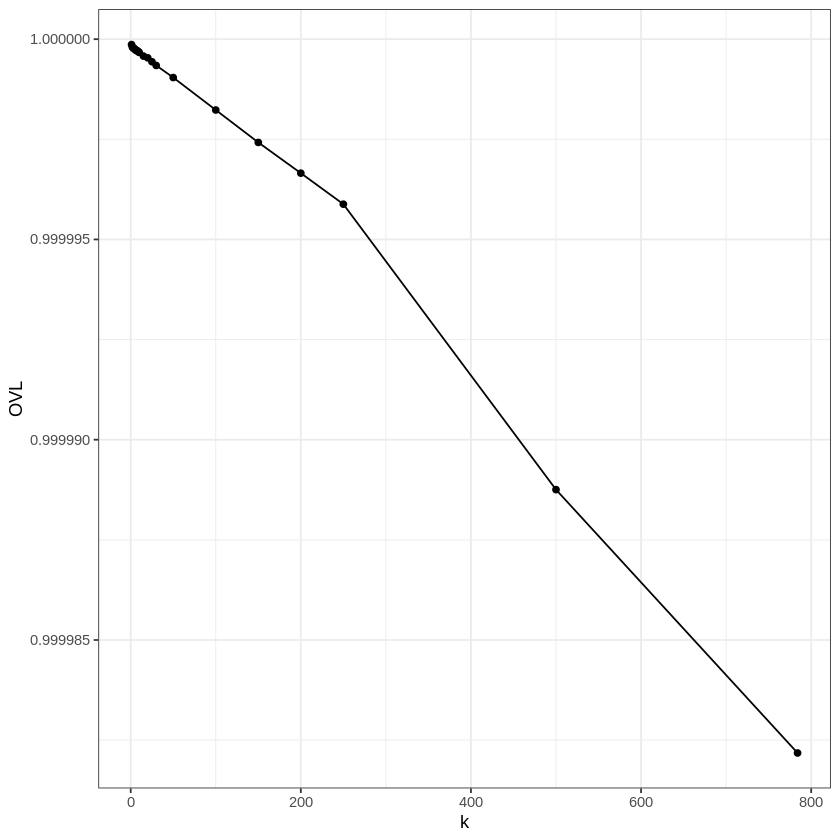

In [16]:
## Sanity Check
klist = c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 50, 100, 150, 200, 250, 500, 784)
k_test_res = lapply(1:length(klist), function(i) get_ndim_ovl(mnist_dset$train[[1]], mnist_dset$train[[1]], k=klist[i]))

install.packages("ggplot2")
library(ggplot2)
data.frame(k=klist, OVL = do.call(c, k_test_res)) %>% ggplot(aes(x=k, y=OVL)) + geom_path() + #ylim(c(0.99,1)) +
  geom_point() + theme_bw()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



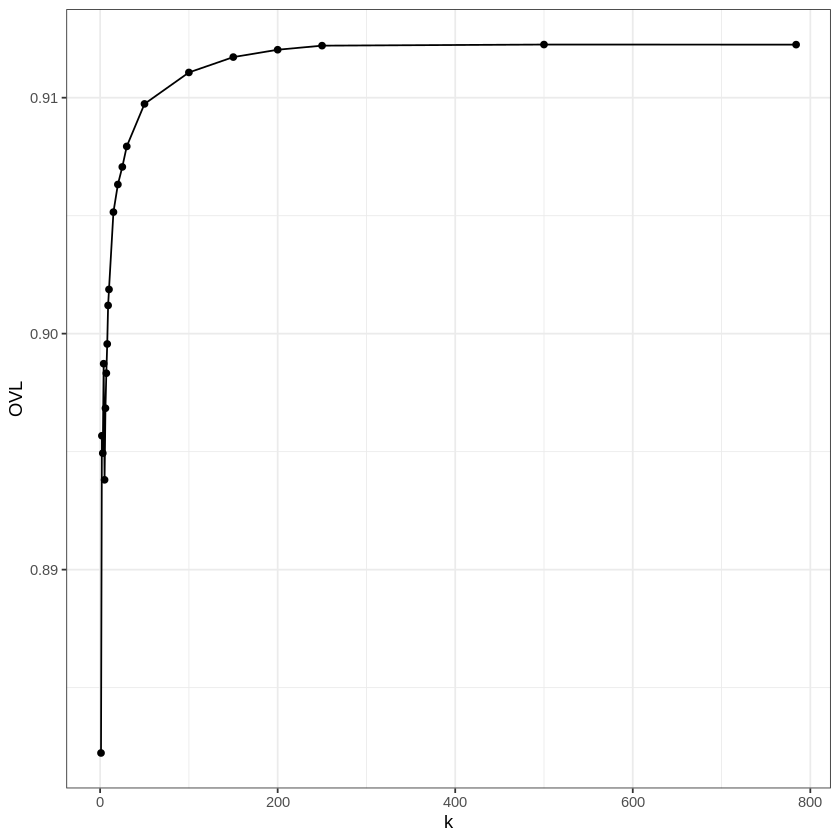

In [17]:
## select k
klist = c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 50, 100, 150, 200, 250, 500, 784)
k_test_res = lapply(1:length(klist), function(i) get_ndim_ovl(mnist_dset$train[[1]], mnist_dset$test[[1]], k=klist[i]))

install.packages("ggplot2")
library(ggplot2)
data.frame(k=klist, OVL = do.call(c, k_test_res)) %>% ggplot(aes(x=k, y=OVL)) + geom_path() + #ylim(c(0.9,1)) +
  geom_point() + theme_bw()

In [10]:
## MNIST Example
## 10 by 10 comparisons
ovl_mat_mnist = matrix(rep(NA, 100), nrow=10)

## Main
for(i in 1:length(mnist_dset$train)){
  for(j in 1:length(mnist_dset$test)){
    ovl_mat_mnist[i, j] = get_ndim_ovl(train_dset=mnist_dset$train[[i]], 
                                        test_dset=mnist_dset$test[[j]], k=250)
  }
}

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess




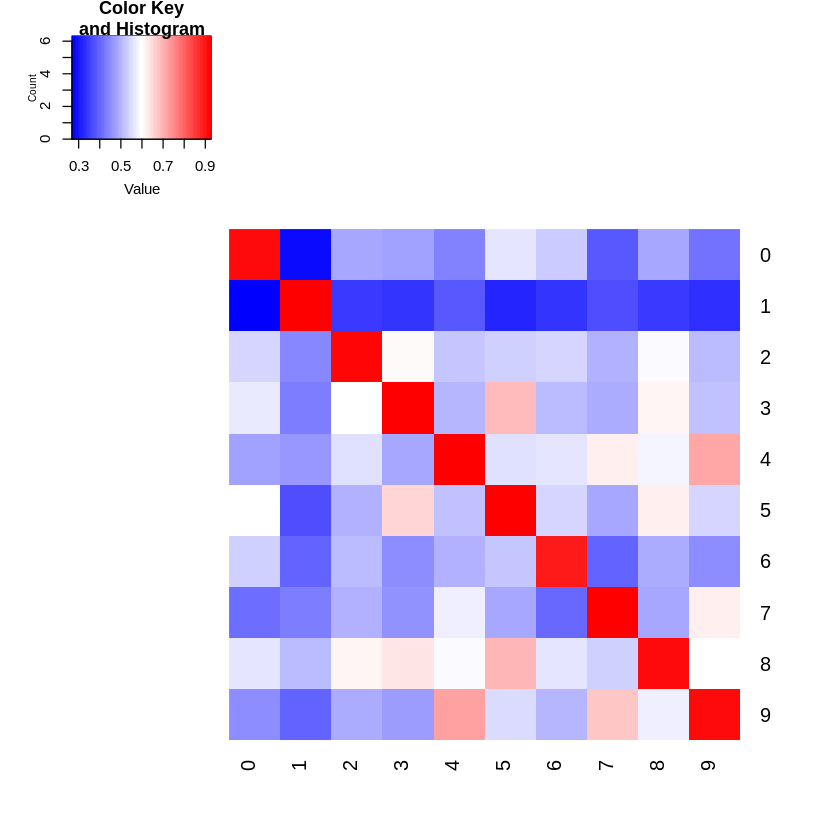

In [11]:
install.packages("gplots")
library(gplots)
gplots::heatmap.2(as.matrix(ovl_mat_mnist), dendrogram='none', Rowv = FALSE, Colv = FALSE, tracecol = NA, labRow = 0:9, labCol=0:9, col=bluered(100))

Loading required package: ggpubr

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘ggpubr’”


$t_test_res

	Welch Two Sample t-test

data:  diag(as.matrix(ovl_mat)) and as.vector(ovl_mat2)[as.vector(ovl_mat2) > -1]
t = 38.82, df = 97.988, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.3926692 0.4349785
sample estimates:
mean of x mean of y 
0.9175968 0.5037729 


$p


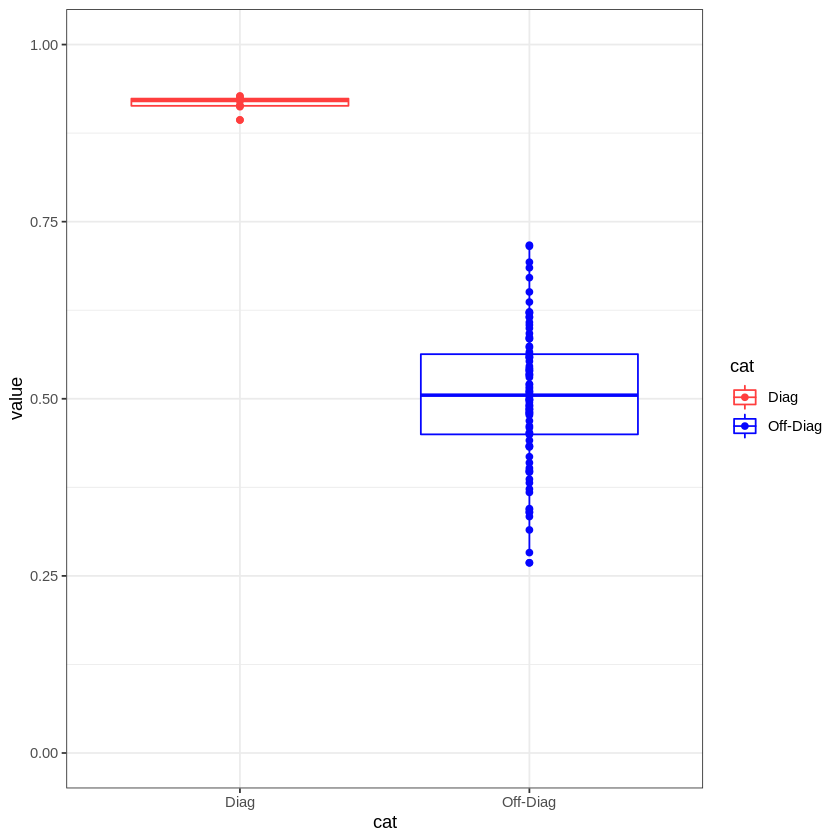

In [12]:
get_diff_graph(ovl_mat_mnist)

In [ ]:
## ORL example
orl_dset = readRDS("./ORL_Preprocessed.RDS")

## remove RGB Image (41th person), Use only binary image
orl_dset$train = orl_dset$train[1:40]
orl_dset$test = orl_dset$test[1:40]
orl_dset$train_label[-((length(orl_dset$train_label)-5):length(orl_dset$train_label))]
orl_dset$test_label[-((length(orl_dset$test_label)-5):length(orl_dset$test_label))]

## 40 x 40 comparisons
ovl_mat_orl = matrix(rep(NA, 1600), nrow=40)

## Main
for(i in 1:length(orl_dset$train)){
  for(j in 1:length(orl_dset$test)){
    ovl_mat_orl[i, j] = get_ndim_ovl(orl_dset$train[[i]], orl_dset$test[[j]], k=5)
  }
}

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



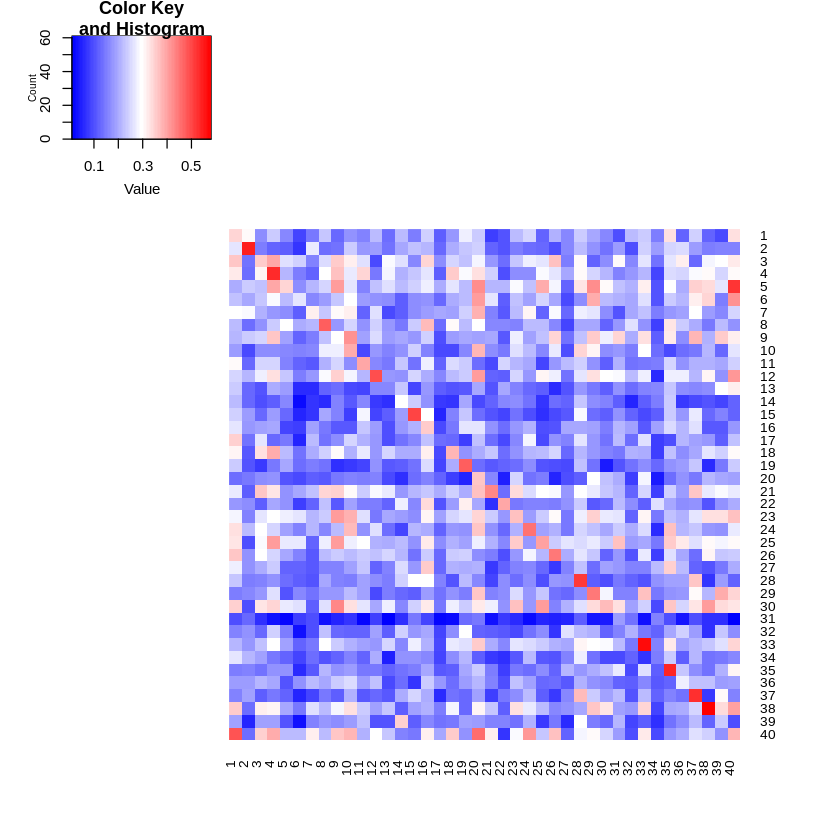

In [14]:
install.packages("gplots")
library(gplots)
gplots::heatmap.2(as.matrix(ovl_mat_orl), dendrogram='none', Rowv = FALSE, Colv = FALSE, tracecol = NA, labRow = 1:40, labCo=1:40, col=bluered(100))

Loading required package: ggpubr

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘ggpubr’”


$t_test_res

	Welch Two Sample t-test

data:  diag(as.matrix(ovl_mat)) and as.vector(ovl_mat2)[as.vector(ovl_mat2) > -1]
t = 9.2868, df = 39.833, p-value = 1.624e-11
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.1435278 0.2233900
sample estimates:
mean of x mean of y 
0.3758395 0.1923806 


$p


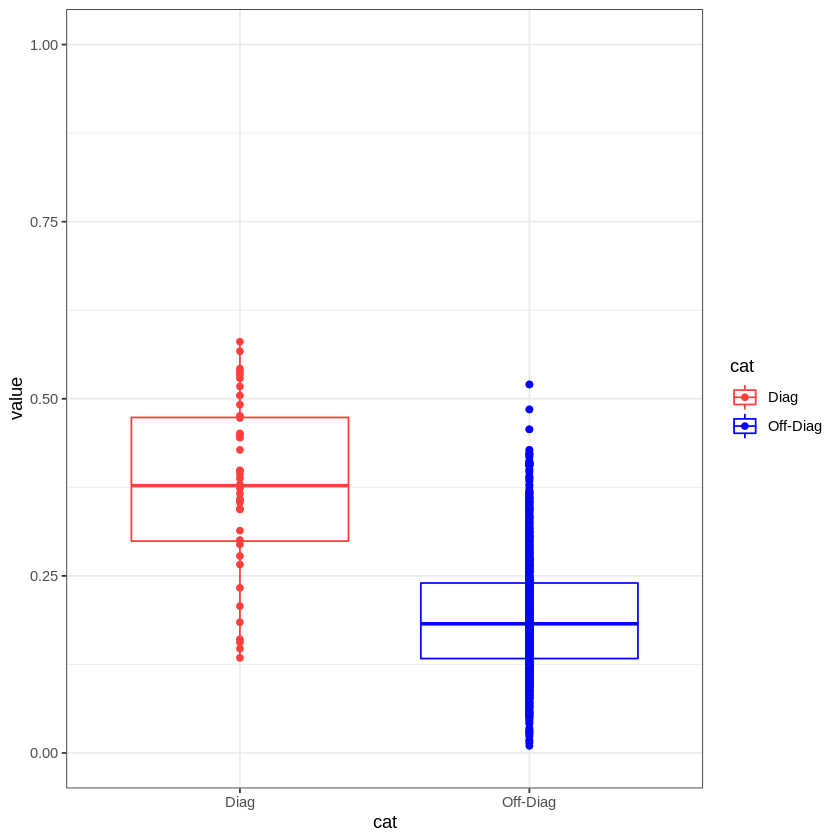

In [15]:
get_diff_graph(ovl_mat_orl)